# Online Sales Data: *8+* plots using `ggplot2` | `Date/Time Formatting`

**<font color=red>Mr Fugu Data Science</font>**

# (◕‿◕✿)

[Github](https://github.com/MrFuguDataScience)
[Youtube](https://www.youtube.com/channel/UCbni-TDI-Ub8VlGaP8HLTNw?view_as=subscriber)

# Purpose & Outcome:

+ Convert/Format Date data for plotting
+ Plot: Sales By Country Quantity Sold
    + Then By Dollar Amount By Country 
+ Orders Sold By Month
    + By Day 
        + By Hour
+ Use Range of Dollar Amounts and Plot

In [2]:
library(rmarkdown)
library(knitr)
# library(tidyr)
library(tidyverse)
# library(quanteda) # NLP Processing
library(ggplot2) # plotting

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Package version: 2.0.1

Parallel computing: 2 of 4 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: ‘quanteda’


The following object is masked from ‘jupyter:irkernel’:

    View


The following object is masked from ‘package:utils’:

    View




In [1]:
onlineretail<-read.csv("online_sales.csv")

In [3]:
head(onlineretail)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [5]:
# Removing Duplicate Rows: 
online_retail_am <- onlineretail %>% distinct()
head(online_retail_am)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [6]:
# remove_na

remove_na<-na.omit(online_retail_am)
head(remove_na)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
6,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom


In [7]:
# Canceled Orders:
sort_countries<-remove_na[order(remove_na$Country,remove_na$Description),]

canceled_orders<-sort_countries[grep("C",sort_countries$InvoiceNo),]

head(canceled_orders)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>
267920,C560540,22150,3 STRIPEY MICE FELTCRAFT,-1,7/19/2011 12:26,1.95,12415,Australia
267931,C560540,20979,36 PENCILS TUBE RED RETROSPOT,-1,7/19/2011 12:26,1.25,12415,Australia
267922,C560540,22138,BAKING SET 9 PIECE RETROSPOT,-1,7/19/2011 12:26,4.95,12415,Australia
267906,C560540,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,-1,7/19/2011 12:26,1.65,12415,Australia
267907,C560540,23190,BUNDLE OF 3 SCHOOL EXERCISE BOOKS,-1,7/19/2011 12:26,1.65,12415,Australia
267915,C560540,22973,CHILDREN'S CIRCUS PARADE MUG,-1,7/19/2011 12:26,1.65,12415,Australia


In [8]:
# Using If/Else Conditions: here we are convert a qty of >1 to 1, else 0.
sort_countries$CanceledQty <- ifelse(sort_countries$Quantity>=1, 1, 0)
head(sort_countries)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>
302520,563614,23345,DOLLY GIRL BEAKER,200,8/18/2011 8:51,1.08,12415,Australia,1
362626,568708,23391,I LOVE LONDON MINI BACKPACK,4,9/28/2011 15:41,4.15,12393,Australia,1
226306,556917,22418,10 COLOUR SPACEBOY PEN,48,6/15/2011 13:37,0.85,12415,Australia,1
89387,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2/15/2011 9:52,0.55,12415,Australia,1
131085,547659,20984,12 PENCILS TALL TUBE POSY,12,3/24/2011 13:05,0.85,12434,Australia,1
226294,556917,20984,12 PENCILS TALL TUBE POSY,240,6/15/2011 13:37,0.29,12415,Australia,1


In [9]:
# Enabling Now to match rows and remove: this is because a canceled order usually
# has a corresponding value, unless it occured before dataset date range

canceled_orders$Quantity<-abs(canceled_orders$Quantity)
sort_countries$Quantity<-abs(sort_countries$Quantity)
# head(sort_countries)

In [10]:
fun<-sort_countries %>% 
  left_join(select(canceled_orders, CustomerID, StockCode, Quantity, Matches=Country)) %>% 
  mutate(Matches=ifelse(is.na(Matches), FALSE, TRUE))

Joining, by = c("StockCode", "Quantity", "CustomerID")



In [439]:
mm<-fun[!duplicated(fun),]

Order_Canceled<-mm[mm$Matches=='TRUE',] # corresponds to orginal match to canceled

Rest_ofData<-mm[mm$Matches=='FALSE',] # Orders that were never canceled

`--------------------------------------------------`

# New Code Where we Start Today: 

+ Market Research of Sales Data Sales

In [613]:
# Taking the Date column and converting from char -> date/time

time_<-strptime(Rest_ofData$InvoiceDate, "%m/%d/%Y %H:%M")

head(time_)

[1] "2011-08-18 08:51:00 MDT" "2011-09-28 15:41:00 MDT"
[3] "2011-06-15 13:37:00 MDT" "2011-02-15 09:52:00 MST"
[5] "2011-03-24 13:05:00 MDT" "2011-06-15 13:37:00 MDT"

In [615]:

time_conversion<-as.POSIXct(time_) # convert object to class: date/time


dates_fix<-data.frame(
   date=time_conversion,
   hour=format(time_conversion, "%H"),
   day=format(time_conversion,"%d"),
   month=format(time_conversion,"%m"),
   year=format(time_conversion,"%Y"),
month_year=format(time_conversion,"%m/%Y"))

# month(dates_fix$month,label=TRUE)

dates_fix<-dates_fix[order(dates_fix$month),] #order by Months

head(dates_fix)

,date,hour,day,month,year,month_year
,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>
10,2011-01-11 09:47:00,09,11,01,2011,01/2011
21,2011-01-06 11:12:00,11,06,01,2011,01/2011
27,2011-01-06 11:12:00,11,06,01,2011,01/2011
37,2011-01-28 14:37:00,14,28,01,2011,01/2011
42,2011-01-28 14:37:00,14,28,01,2011,01/2011
46,2011-01-28 14:37:00,14,28,01,2011,01/2011


In [505]:
# Creating the Month Abbrevation from Numeric: ex.) 1 -> Jan, then create new column

dates_fix$month_abbrv<-month.abb[as.numeric(dates_fix$month)]

head(dates_fix)

,date,hour,day,month,year,month_year,month_abbrv
,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
10,2011-01-11 09:47:00,09,11,01,2011,01/2011,Jan
21,2011-01-06 11:12:00,11,06,01,2011,01/2011,Jan
27,2011-01-06 11:12:00,11,06,01,2011,01/2011,Jan
37,2011-01-28 14:37:00,14,28,01,2011,01/2011,Jan
42,2011-01-28 14:37:00,14,28,01,2011,01/2011,Jan
46,2011-01-28 14:37:00,14,28,01,2011,01/2011,Jan


# Preprocess & Plot By Country Quantites Sold:

In [346]:

grouped<-Rest_ofData %>% group_by(Country,Quantity)

extr_cols<-data.frame(Country=grouped$Country,Quantity=grouped$Quantity)

sum_by_country<-aggregate(Quantity ~ Country, extr_cols, sum)


ordered_freq<-sum_by_country %>% arrange(desc(sum_by_country$Quantity))


head(ordered_freq)

,Country,Quantity
,<chr>,<int>
1,United Kingdom,3991914
2,Netherlands,199744
3,EIRE,131302
4,Germany,118033
5,France,109157
6,Australia,83691


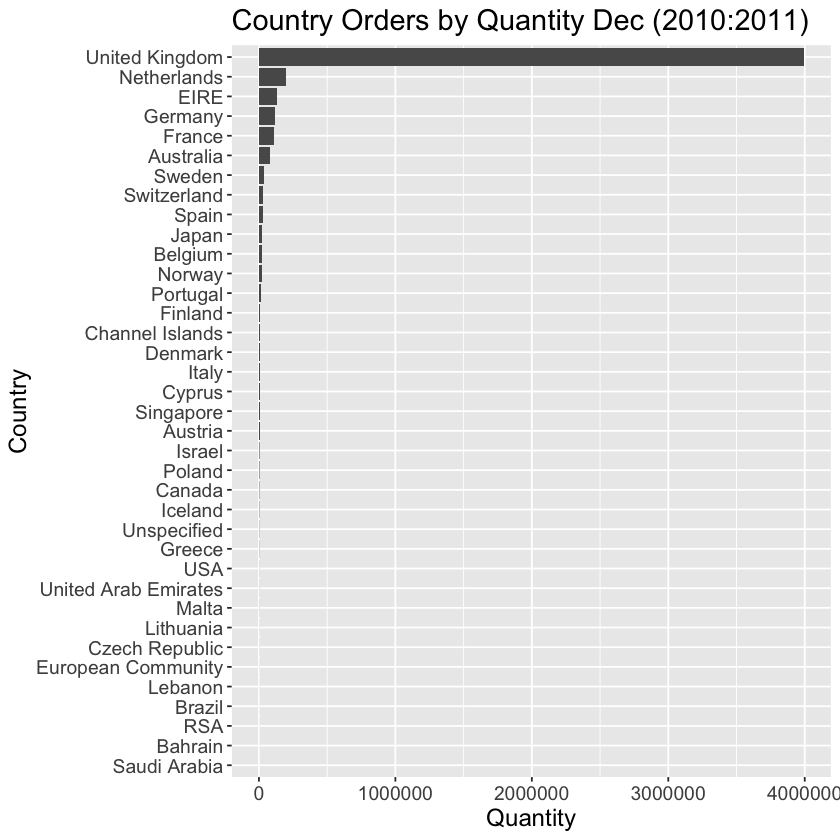

In [596]:

bar_p<-ggplot(data=ordered_freq, aes(x=reorder(Country,Quantity), y=Quantity))+
geom_bar(stat='identity')+coord_flip()+
theme(text = element_text(size = 14.5)) 
# Increases All text size at once
# theme(axis.text = element_text(size = 14.5))

options(scipen=999) # remove scientific notation on axis

# add y-label and add Title
bar_p + labs(x = 'Country', y = 'Quantity', fill = NULL,
                 title = "Country Orders by Quantity Dec (2010:2011)")



# ggsave(plot = bar_p, width = 10, height = 10, dpi = 400, filename = "not squished axis.pdf")

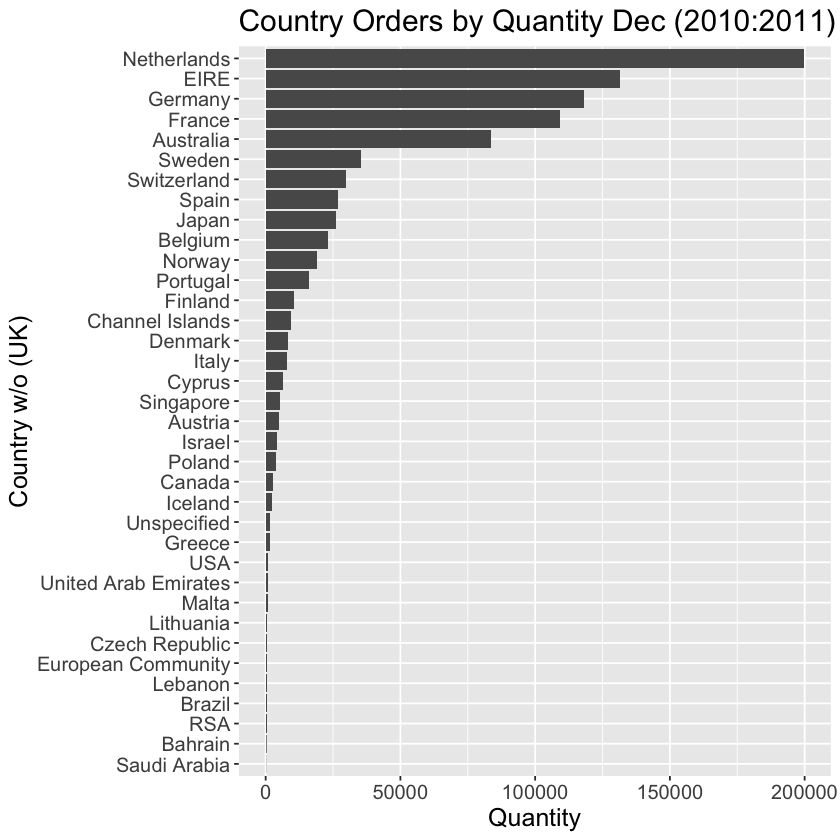

In [601]:
# WITHOUT UNITED KINGDOM: because it dominates the graph dissproportionately

new_df<-subset(ordered_freq, Country!='United Kingdom') #remove UK

bar_p<-ggplot(data=new_df, aes(x=reorder(Country,Quantity), y=Quantity))+
geom_bar(stat='identity')+coord_flip()+
theme(text = element_text(size = 15)) 
# Increases All text size at once
# theme(axis.text = element_text(size = 13.5))


# add y-label and add Title
bar_p + labs(x = 'Country w/o (UK)', y = 'Quantity', fill = NULL,
                 title = "Country Orders by Quantity Dec (2010:2011)")



# Preporcess & Plot Country Sales in British Pounds:

In [366]:
# Sales By Currency Amount by Country: Preprocessing

# Create Sales Totals: 
sales_totals_added<-transform(Rest_ofData, Total = UnitPrice * Quantity)

# Group by Country then Total sales
grouped_sales_tots<-sales_totals_added %>% group_by(Country,Total)

# new DF with only these columns
extr_cols_tots<-data.frame(Country=grouped_sales_tots$Country,
                           Totals=grouped_sales_tots$Total)

# Sum all Sales by each Country
totals_by_country<-aggregate(Totals ~ Country, extr_cols_tots, sum)

# head(totals_by_country)


head(totals_by_country %>% arrange(desc(totals_by_country$Totals)))

,Country,Totals
,<chr>,<dbl>
1,United Kingdom,6765359.4
2,Netherlands,283643.9
3,EIRE,237641.8
4,Germany,222920.9
5,France,203959.5
6,Australia,136919.9


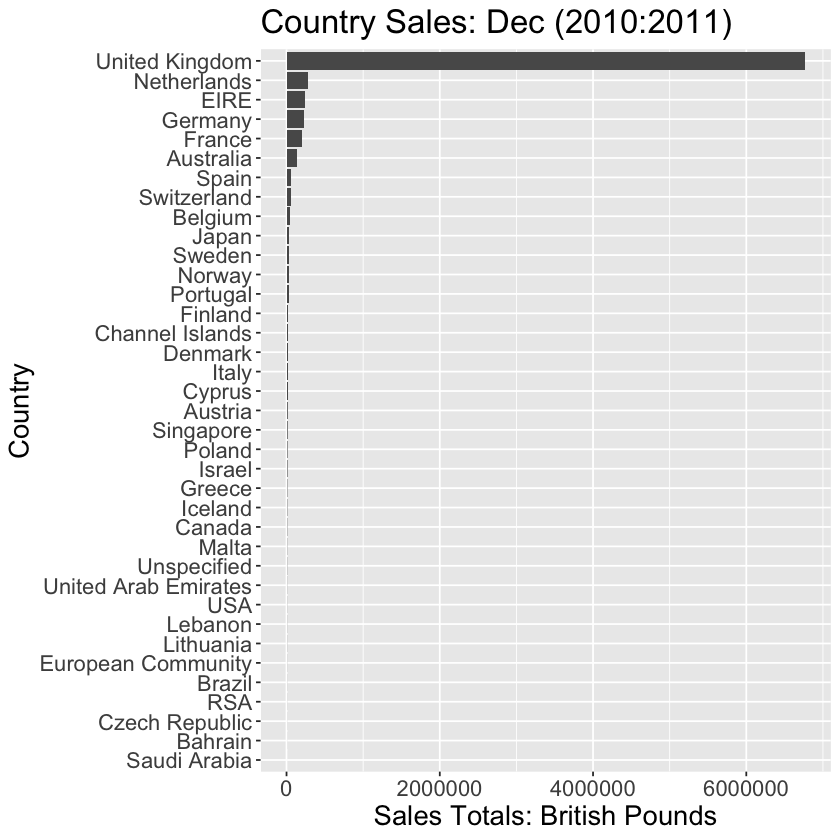

In [604]:
bar_pp<-ggplot(data=totals_by_country, aes(x=reorder(Country,Totals), y=Totals))+
geom_bar(stat='identity')+coord_flip()+
theme(text = element_text(size = 16.5)) 
# Increases All text size at once
# theme(axis.text = element_text(size = 13.5))
options(scipen=999)

# add y-label and add Title
bar_pp + labs(x = 'Country', y = 'Sales Totals: British Pounds', fill = NULL,
                 title = "Country Sales: Dec (2010:2011)")

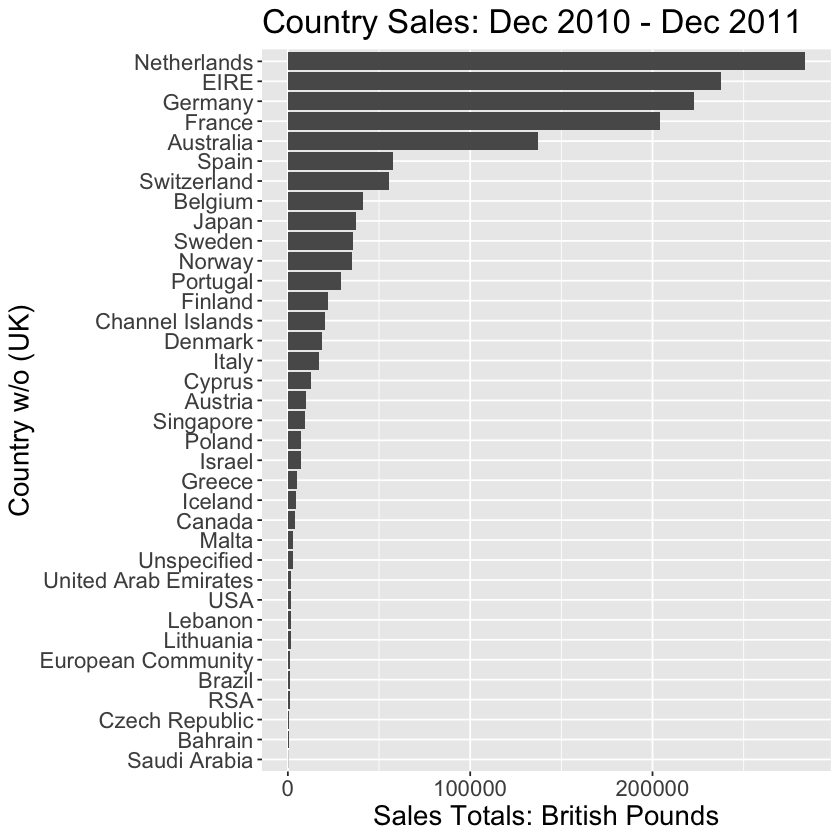

In [605]:
# Plot By Country Sales:

new_df_<-subset(totals_by_country, Country!='United Kingdom') #remove UK

bar_pp<-ggplot(data=new_df_, aes(x=reorder(Country,Totals), y=Totals))+
geom_bar(stat='identity')+coord_flip()+
theme(text = element_text(size = 16.6)) 
# Increases All text size at once
# theme(axis.text = element_text(size = 13.5))
options(scipen=999)

# add y-label and add Title
bar_pp + labs(x = 'Country w/o (UK)', y = 'Sales Totals: British Pounds', fill = NULL,
                 title = "Country Sales: Dec 2010 - Dec 2011")

# Plot By Month Sales:

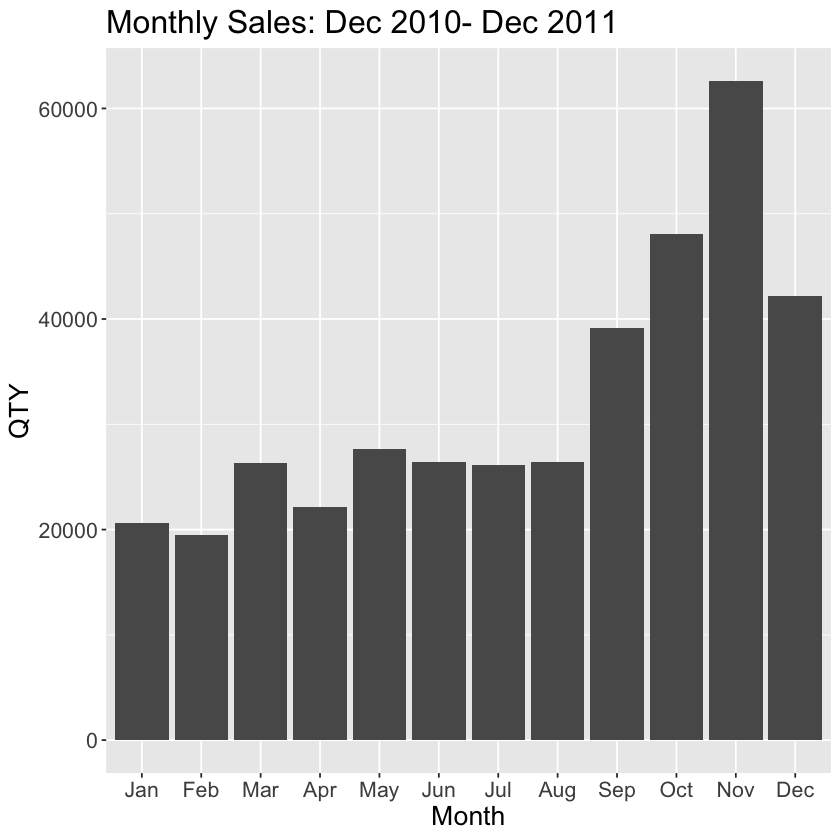

In [606]:

sales_by_month_freq<-table(dates_fix$month_abbrv)


neworder<-c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
# # setcolorder(sales_by_month_freq, neworder)


month_data<-data.frame(sales_by_month_freq)
names(month_data)[1]<-'Month'


bar_ppp<-ggplot(data=month_data, aes(x=factor(Month, level = neworder), y=Freq))+
geom_bar(stat='identity')+theme(text = element_text(size = 16)) 


# add y-label and add Title
bar_ppp + labs(x = 'Month', y = 'QTY', fill = NULL,
                 title = "Monthly Sales: Dec 2010- Dec 2011")

# Plot Sales By Day of Month:

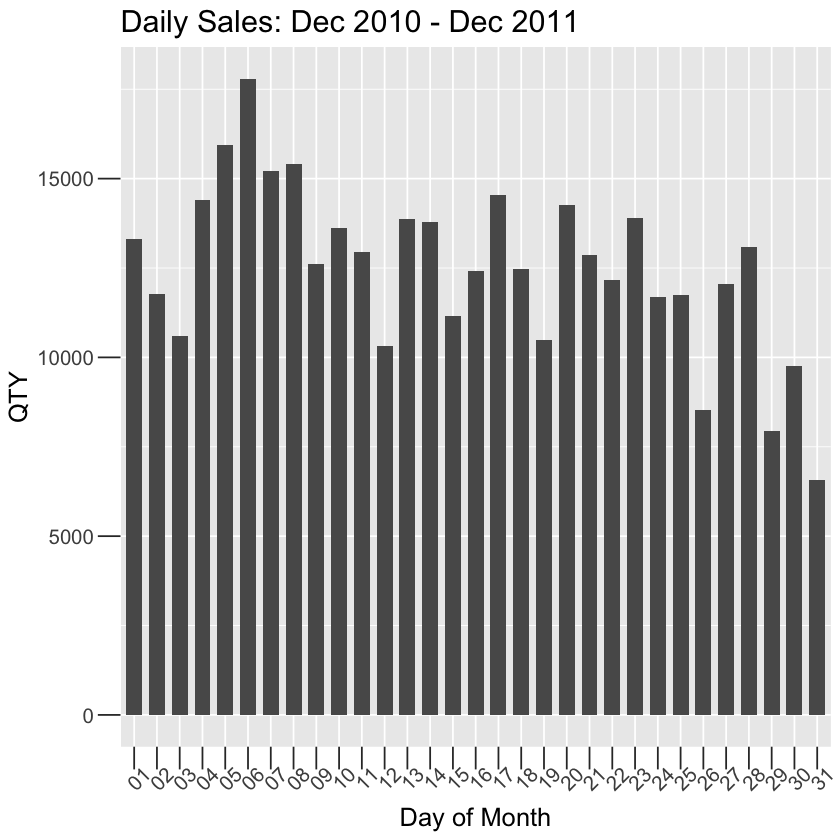

In [607]:

sales_by_day_of_month_freq<-table(dates_fix$day)

day_freq<-data.frame(sales_by_day_of_month_freq)

names(day_freq)[1]<-'Day_of_Month'

bar_pppp<-ggplot(data=day_freq, aes(x=Day_of_Month, y=Freq))+

# add spacing: position_dodge, and width
geom_bar(stat='identity',width=0.7,position=position_dodge(width=.8))+
theme(text = element_text(size = 15.3)) 

# add y-label and add Title
bar_pppp + labs(x = 'Day of Month', y = 'QTY', fill = NULL,
                 title = "Daily Sales: Dec 2010 - Dec 2011")+
theme(axis.ticks.length =unit(4.8,"mm"),axis.ticks.y = element_line(size=0.5))+

theme(axis.text.x = element_text(angle = 45))

# Hourly Sales:

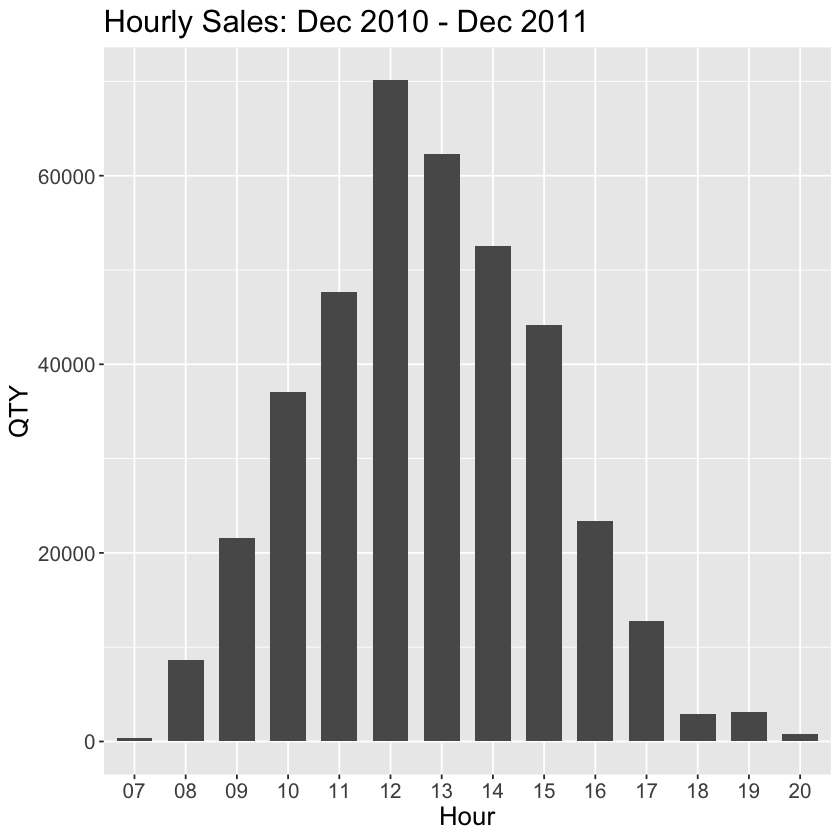

In [608]:

sales_by_hour_freq<-table(dates_fix$hour)

hour_freq<-data.frame(sales_by_hour_freq)

names(hour_freq)[1]<-'Hour'


bar_p_hourly<-ggplot(data=hour_freq, aes(x=Hour, y=Freq))+

# add spacing: position_dodge, and width
geom_bar(stat='identity',width=0.7,position=position_dodge(width=.8))+
theme(text = element_text(size = 15.5)) 

# add y-label and add Title
bar_p_hourly + labs(x = 'Hour', y = 'QTY', fill = NULL,
                 title = "Hourly Sales: Dec 2010 - Dec 2011")

# Plot Day of Week Sales:

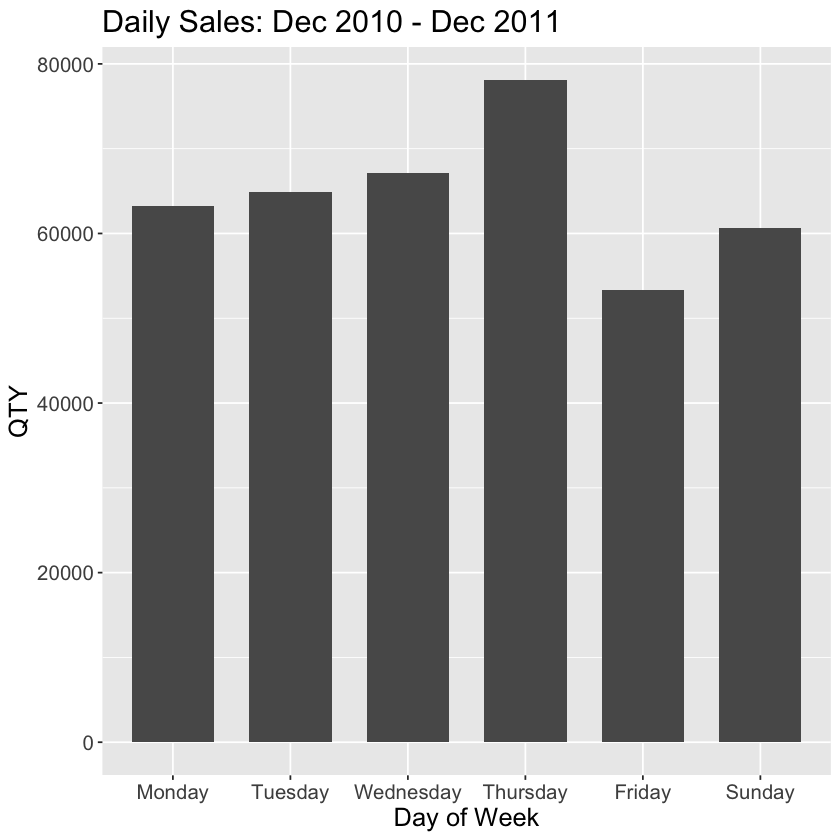

In [609]:
# library(lubridate)

dates_fix$day_of_week<-format(dates_fix$date, format = "%A")

day_of_week_tbl<-table(dates_fix$day_of_week)

day_freq<-data.frame(day_of_week_tbl)

names(day_freq)[1]<-'Day'
# day_freq

# Need to Use so Columns of Graph are correctly ordered: look at aes(x=)
days_ordered<-c('Monday','Tuesday','Wednesday','Thursday','Friday','Sunday')

bar_p_day<-ggplot(data=day_freq, aes(x=factor(Day, level = days_ordered), y=Freq))+

# add spacing: position_dodge, and width
geom_bar(stat='identity',width=0.7,position=position_dodge(width=.8))+
theme(text = element_text(size = 15.3)) 

# add Title & labels
bar_p_day + labs(x = 'Day of Week', y = 'QTY', fill = NULL,
                 title = "Daily Sales: Dec 2010 - Dec 2011")

# Sales By Month & Year:

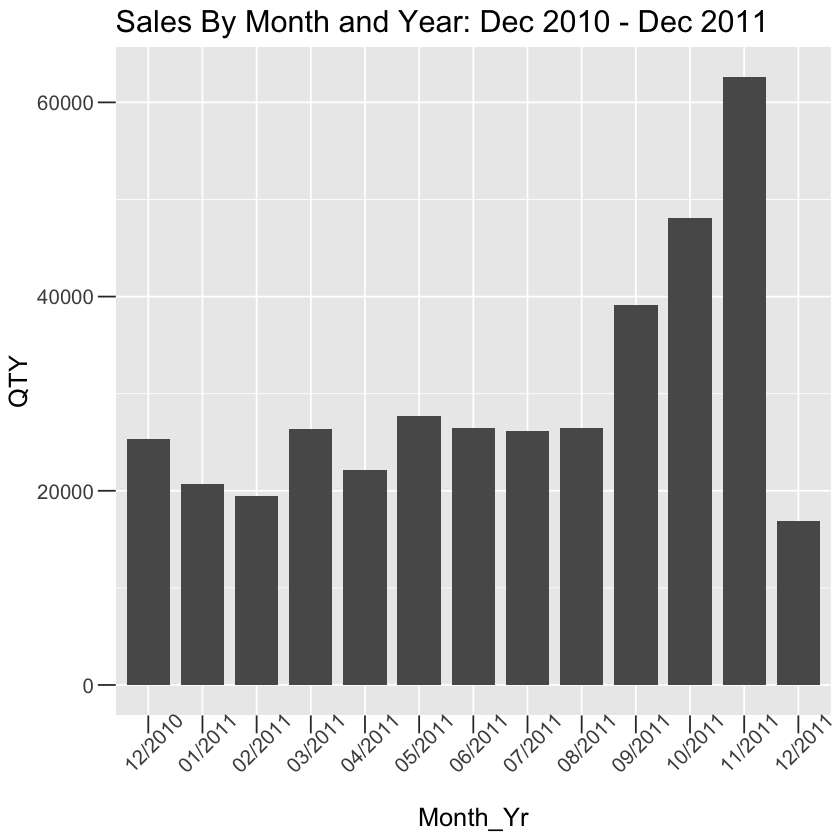

In [610]:
# month_yr<-dates_fix$month_year

monthYr_tbl<-table(dates_fix$month_year)

MonthYr_freq<-data.frame(monthYr_tbl)

names(MonthYr_freq)[1]<-'Month_Yr'

ordered_monthYr<-c('12/2010','01/2011','02/2011','03/2011','04/2011',
'05/2011','06/2011','07/2011','08/2011','09/2011','10/2011','11/2011','12/2011')

bar_p_MonthYr<-ggplot(data=MonthYr_freq, aes(x=factor(Month_Yr, level = ordered_monthYr),
                                             y=Freq))+

# add spacing: position_dodge, and width
geom_bar(stat='identity',width=.8,position=position_dodge(width=4.9))+
theme(text = element_text(size = 15.3)) 

# add Title & labels
bar_p_MonthYr + labs(x = 'Month_Yr', y = 'QTY', fill = NULL,
                 title = "Sales By Month and Year: Dec 2010 - Dec 2011")+

 theme(axis.ticks.length =unit(3.8,"mm"),axis.ticks.y = element_line(size=0.5))+

theme(axis.text.x = element_text(angle = 45))


In [560]:
# Plot By Dollar Range:

Rest_ofData$price_range <- ifelse(Rest_ofData$UnitPrice <1,
'LessThanDollar',ifelse(Rest_ofData$UnitPrice >=1 & Rest_ofData$UnitPrice <=3,'OnetoThree',
ifelse(Rest_ofData$UnitPrice >3 & Rest_ofData$UnitPrice <=5,'ThreetoFive',
ifelse(Rest_ofData$UnitPrice>5 & Rest_ofData$UnitPrice <=10, 'FivetoTen','OverTen'))))

head(Rest_ofData)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CanceledQty,Matches,price_range
,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<lgl>,<chr>
1,563614,23345,DOLLY GIRL BEAKER,200,8/18/2011 8:51,1.08,12415,Australia,1,FALSE,OnetoThree
2,568708,23391,I LOVE LONDON MINI BACKPACK,4,9/28/2011 15:41,4.15,12393,Australia,1,FALSE,ThreetoFive
3,556917,22418,10 COLOUR SPACEBOY PEN,48,6/15/2011 13:37,0.85,12415,Australia,1,FALSE,LessThanDollar
4,543989,20973,12 PENCIL SMALL TUBE WOODLAND,384,2/15/2011 9:52,0.55,12415,Australia,1,FALSE,LessThanDollar
5,547659,20984,12 PENCILS TALL TUBE POSY,12,3/24/2011 13:05,0.85,12434,Australia,1,FALSE,LessThanDollar
6,556917,20984,12 PENCILS TALL TUBE POSY,240,6/15/2011 13:37,0.29,12415,Australia,1,FALSE,LessThanDollar


# Plot Based on Items within a price range:

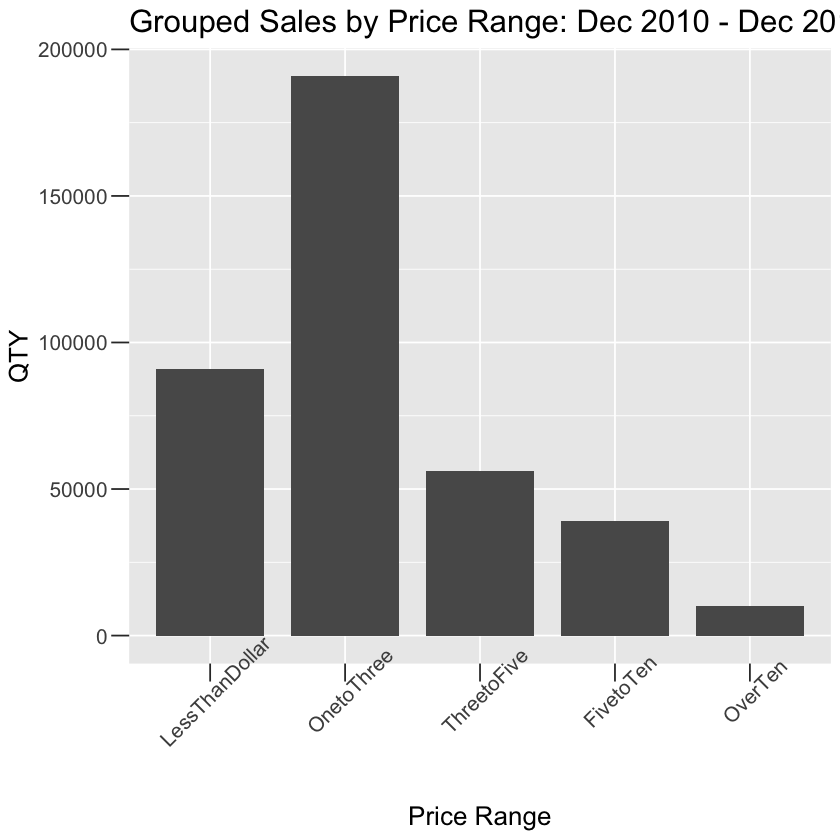

In [612]:

ranges_tbl<-table(Rest_ofData$price_range)

price_ranges_freq<-data.frame(ranges_tbl)

names(price_ranges_freq)[1]<-'Range'

# price_ranges_freq

ordered_range<-c('LessThanDollar','OnetoThree','ThreetoFive','FivetoTen','OverTen')

bar_p_priceRanges<-ggplot(data=price_ranges_freq, 
            aes(x=factor(Range, level = ordered_range),y=Freq))+

# add spacing: position_dodge, and width
geom_bar(stat='identity',width=.8,position=position_dodge(width=4.9))+
theme(text = element_text(size = 15.6)) 

# add Title & labels
bar_p_priceRanges + labs(x = 'Price Range', y = 'QTY', fill = NULL,
                 title = "Grouped Sales by Price Range: Dec 2010 - Dec 2011")+

 theme(axis.ticks.length =unit(3.8,"mm"),axis.ticks.y = element_line(size=0.5))+

theme(axis.text.x = element_text(angle = 45))

# <font color=red>Like,Share & SUB</font>scribe

# <font color=red>Turn on Notification Bell</font>

# Citations & Help:

https://towardsdatascience.com/exploratory-data-analysis-on-e-commerce-data-be24c72b32b2 (motivation for today's video)

https://rpubs.com/sediaz/Month_Abb (convert digit to month abbrev.)

https://stackoverflow.com/questions/36290525/extract-time-and-date-from-posixct

https://lubridate.tidyverse.org/ (date time package optional)

https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/as.POSIX*

https://stackoverflow.com/questions/1660124/how-to-sum-a-variable-by-group

https://stackoverflow.com/questions/25061822/ggplot-geom-text-font-size-control

https://bradleyboehmke.github.io/tutorials/barchart (Good Basics Help)

https://rpubs.com/KamleshJha/ggplot

https://stackoverflow.com/questions/12774210/how-do-you-specifically-order-ggplot2-x-axis-instead-of-alphabetical-order

https://stackoverflow.com/questions/9216138/find-the-day-of-a-week

https://www.datanovia.com/en/blog/ggplot-axis-ticks-set-and-rotate-text-labels/